                                      Sentiment Analysis ( NLP ) 

                                DataSet [" Amazon_Fine_Food_Review "]

In [146]:
# Import_Important_Libraries

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
df = pd.read_csv(r'C:\Users\DELL\Music\Amazon Fine Food Reviews\Reviews.csv')

In [8]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [10]:
df.shape

(568454, 10)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568438 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [16]:
df.Summary.head()

0    Good Quality Dog Food
1        Not as Advertised
2    "Delight" says it all
3           Cough Medicine
4              Great taffy
Name: Summary, dtype: object

In [18]:
df.Text.head()

0    I have bought several of the Vitality canned d...
1    Product arrived labeled as Jumbo Salted Peanut...
2    This is a confection that has been around a fe...
3    If you are looking for the secret ingredient i...
4    Great taffy at a great price.  There was a wid...
Name: Text, dtype: object

In [20]:
! pip install textblob

In [21]:
from nltk.corpus import stopwords 
from textblob import TextBlob
from textblob import Word
# Lower casing and removing punctuations

df['Text'] = df['Text'].apply(lambda x: " ".join(x.lower() for
x in x.split()))

In [22]:
df['Text'] = df['Text'].str.replace('[^\w\s]', "")
df.Text.head(5)

C:\Users\DELL\AppData\Local\Temp\ipykernel_18152\907301202.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Text'] = df['Text'].str.replace('[^\w\s]', "")


0    i have bought several of the vitality canned d...
1    product arrived labeled as jumbo salted peanut...
2    this is a confection that has been around a fe...
3    if you are looking for the secret ingredient i...
4    great taffy at a great price there was a wide ...
Name: Text, dtype: object

In [26]:
# Example how a string.replace function works.

In [28]:
string = "yoo the food was delicious"

In [30]:
print(string.replace("delicious", "Yummy"))

yoo the food was Yummy


In [32]:
# Removal of Stop Words

In [34]:
pip install nltk textblob

Note: you may need to restart the kernel to use updated packages.


In [35]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [36]:
import nltk
from nltk.corpus import stopwords
from textblob import TextBlob
from textblob import Word
import pandas as pd

In [40]:
# Download NLTK Data
# Download the stopwords corpus from NLTK:

In [42]:
nltk.download('stopwords')
nltk.download('punkt')  # For sentence tokenization if needed
nltk.download('wordnet') # For lemmatization

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [43]:
# Load Sample DataFrame
# Let's create a sample DataFrame to test the stopword removal, spelling correction, and lemmatization:

# Sample DataFrame

In [46]:
df1 = data = {
    'Text': [
        "Bought several vitality canned dog food products, each labeled with nutritious ingredients.",
        "Product arrived labeled jumbo salted peanuts, their shiny packaging promising a satisfying crunch.",
        "Confection around centuries light pillowy citrus delights have enchanted taste buds.",
        "Looking for the secret ingredient in Robitussin.",
        "Great taffy, great price, and a wide assortment of yummy flavors make this candy shop a favorite destination for both kids and adults."
    ]
}

df1 = pd.DataFrame(data)

In [48]:
# Define stopwords

In [50]:
stop = set(stopwords.words('english'))

In [52]:
# Function to remove stopwords

In [54]:
def remove_stopwords(text):
    return " ".join(word for word in text.split() if word.lower() not in stop)

# Function for spelling correction using TextBlob
def correct_spelling(text):
    corrected_text = TextBlob(text).correct()
    return str(corrected_text)

# Function for lemmatization
def lemmatize_text(text):
    return " ".join([Word(word).lemmatize() for word in text.split()])

In [56]:
# Apply stopword removal
df1['Text'] = df1['Text'].apply(remove_stopwords)

# Display the first few rows after stopword removal
print("After Stopword Removal:")
print(df1.Text.head())

After Stopword Removal:
0    Bought several vitality canned dog food produc...
1    Product arrived labeled jumbo salted peanuts, ...
2    Confection around centuries light pillowy citr...
3                Looking secret ingredient Robitussin.
4    Great taffy, great price, wide assortment yumm...
Name: Text, dtype: object


In [58]:
# Spelling Correction
# Lemmatization

In [60]:
! pip install wordcloud

In [61]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS

In [62]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [63]:
df.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [68]:
df.Score.value_counts()

5    363122
4     80655
1     52268
3     42640
2     29769
Name: Score, dtype: int64

<Axes: xlabel='Score', ylabel='count'>

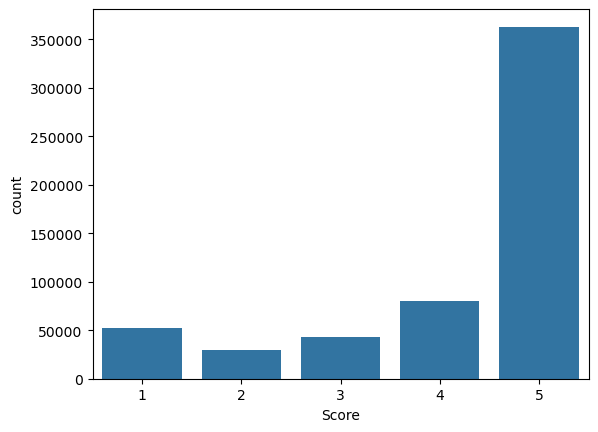

In [70]:
sns.countplot(data = df, x = 'Score')

In [72]:
# Create a new data frame "reviews" to perform exploratory data analysis upon that

In [74]:
reviews = df

In [76]:
# Dropping null values

In [78]:
reviews.dropna(inplace=True)

In [80]:
score_1 = reviews[reviews['Score'] == 1]
score_2 = reviews[reviews['Score'] == 2]
score_3 = reviews[reviews['Score'] == 3]
score_4 = reviews[reviews['Score'] == 4]
score_5 = reviews[reviews['Score'] == 5]

In [82]:
reviews_sample = pd.concat([score_1,score_2,score_3,score_4,score_5],axis=0)
reviews_sample.reset_index(drop=True,inplace=True)

In [84]:
#Wordcloud function's input needs to be a single string of text.
# concatenating all Summaries into a single string.
# similarly you can build for Text column

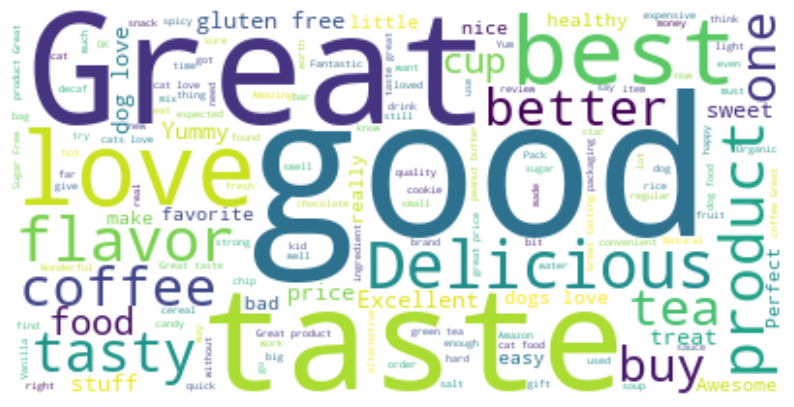

In [86]:
reviews_str = reviews_sample.Summary.str.cat()
wordcloud = WordCloud(background_color='white').generate(reviews_str)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()

In [88]:
# Now let's split the data into Negative (Score is 1 or 2) and Positive (4 or 5) Reviews.

In [90]:
negative_reviews = reviews_sample[reviews_sample['Score'].isin([1,2]) ]
positive_reviews = reviews_sample[reviews_sample['Score'].isin([4,5]) ]

In [92]:
# Transform to single string

In [94]:
negative_reviews_str = negative_reviews.Summary.str.cat()
positive_reviews_str = positive_reviews.Summary.str.cat()

- Create WordCloud

Text(0.5, 1.0, 'Reviews with Negative Scores')

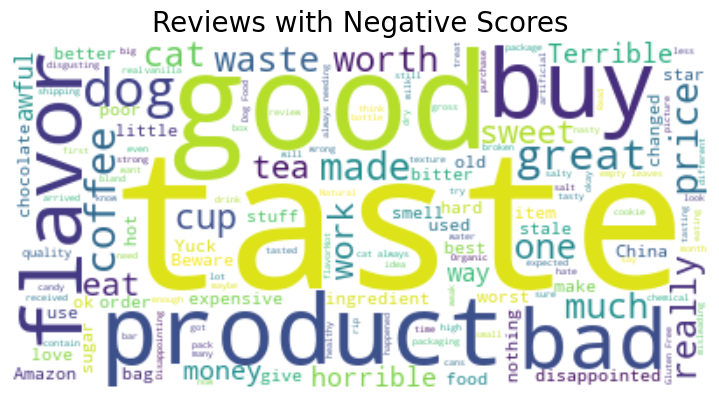

In [97]:
wordcloud_negative = WordCloud(background_color='white').generate(negative_reviews_str)
wordcloud_positive = WordCloud(background_color='black').generate(positive_reviews_str)
# Plot
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(211)
ax1.imshow(wordcloud_negative,interpolation='bilinear')
ax1.axis("off")
ax1.set_title('Reviews with Negative Scores',fontsize=20)

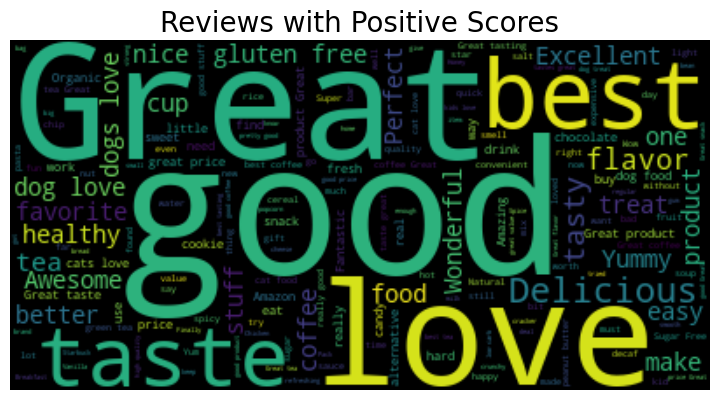

In [98]:
fig = plt.figure(figsize=(10,10))
ax2 = fig.add_subplot(212)
ax2.imshow(wordcloud_positive,interpolation='bilinear')
ax2.axis("off")
ax2.set_title('Reviews with Positive Scores',fontsize=20)
plt.show()

# Sentiment Score

# Install vaderSentiment

In [103]:
!pip install vaderSentiment

In [122]:
import seaborn as sns
import re
import os
import sys
import ast

In [123]:
# Function for getting the sentiment

In [124]:
plt.style.use('fivethirtyeight')
cp = sns.color_palette()
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [125]:
# Generating sentiment for all the sentence present in the dataset

In [126]:
# Generating sentiment for all the sentence present in the dataset

In [127]:
emptyline=[]
for row in df['Text']:
    vs=analyzer.polarity_scores(row)
    emptyline.append(vs)
# Creating new dataframe with sentiments
df_sentiments=pd.DataFrame(emptyline)
df_sentiments.head()

,neg,neu,pos,compound
0,0.000,0.711,0.289,0.9441
1,0.138,0.862,0.000,-0.5664
2,0.087,0.767,0.146,0.8138
3,0.000,0.932,0.068,0.4404
4,0.000,0.599,0.401,0.9468


In [128]:
# Merging the sentiments back to reviews dataframe

In [129]:
df_c = pd.concat([df.reset_index(drop=True), df_sentiments], axis=1)
df_c.head(3)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,neg,neu,pos,compound
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,i have bought several of the vitality canned d...,0.000,0.711,0.289,0.9441
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,product arrived labeled as jumbo salted peanut...,0.138,0.862,0.000,-0.5664
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",this is a confection that has been around a fe...,0.087,0.767,0.146,0.8138


In [130]:
# Convert scores into positive and negetive sentiments using some threshold

In [131]:
df_c['Sentiment'] = np.where(df_c['compound'] >= 0 , 'Positive','Negative')
df_c.head(5)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,neg,neu,pos,compound,Sentiment
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,i have bought several of the vitality canned d...,0.000,0.711,0.289,0.9441,Positive
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,product arrived labeled as jumbo salted peanut...,0.138,0.862,0.000,-0.5664,Negative
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",this is a confection that has been around a fe...,0.087,0.767,0.146,0.8138,Positive
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,if you are looking for the secret ingredient i...,0.000,0.932,0.068,0.4404,Positive
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,great taffy at a great price there was a wide ...,0.000,0.599,0.401,0.9468,Positive


# Result

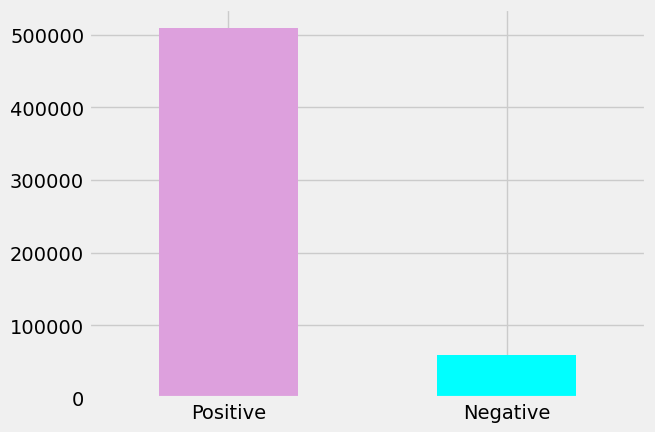

In [133]:
result=df_c['Sentiment'].value_counts()
result.plot(kind='bar', rot=0, color=['plum','cyan']);